# Divergence, Overflow & Tuples
## $$ h(x)=x^5 - 2*x^4 +2$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
# Data Generation
x_1 = np.linspace(start=-2.5,stop=2.5,num=1000)

# Function
def h(x):
    return x**5 - 2*x**4+2

def dh(x):
    return 5*x**4 - 8*x**3

In [52]:
def gradient_descent(derivative_fun, initial_guess, learning_rate, precision, max_iter):

#low_gamma = gradient_descent(derivative_fun = dh, initial_guess = 3, learning_rate = 0.0005, precision = 0.0001,max_iter = n)

    
    new_x = initial_guess
    x_list = [new_x]
    #slope_list = [derivative_func(new_x)]
    slope_list = [derivative_fun(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_fun(previous_x)
        new_x = previous_x - learning_rate * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_fun(new_x))
        
        if step_size < precision:
            break
        
    return new_x, x_list, slope_list

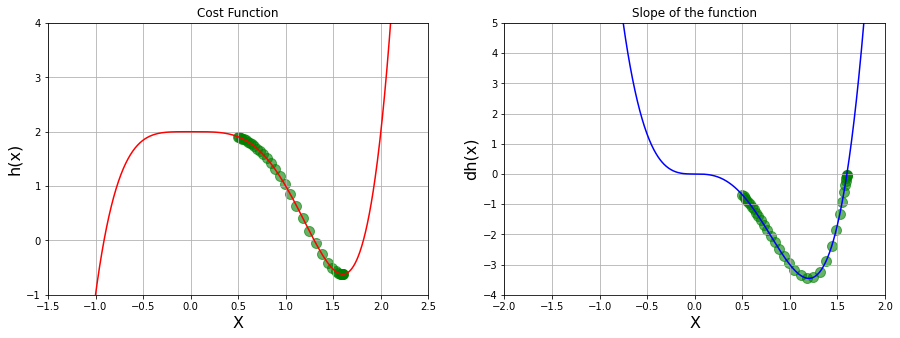

Local min occurts at:  1.5985746230243199
Cost at this minimum is:  -0.6214192324401289
Numer of steps:  35


In [58]:
# Plotting function, scatter and derivative, next to each other

# In case the initial guess is assumed as -0.2, this notebook will show an overflow error
local_min, list_x, deriv_list = gradient_descent(derivative_fun = dh, initial_guess = .5, learning_rate = 0.02, precision = 0.001, max_iter=300)


# Scaling the graph
plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1) # This command decides how to stack the two graphs. If required, (2,1,1), to have them on top of each other

plt.xlim([-1.2,2.5])
plt.ylim(0,8)
plt.grid(True)
plt.xlim(-1.5,2.5)
plt.ylim(-1,4)
plt.title('Cost Function')
plt.xlabel('X',fontsize=16)
plt.ylabel('h(x)',fontsize=16)
plt.plot(x_1,h(x_1),'r')
plt.scatter(list_x,h(np.array(list_x)),s=100,color='green',alpha=0.6)

# 1 Chart: Derivative function
plt.subplot(1,2,2)
plt.title('Slope of the function')
plt.xlabel('X',fontsize=16)
plt.ylabel('dh(x)',fontsize=16)
plt.grid(True)
plt.xlim(-2,2)
plt.ylim(-4,5)

plt.plot(x_1,dh(x_1),'b')
plt.scatter(list_x,deriv_list,s=100,color='green',alpha=0.6)

plt.show()

print('Local min occurts at: ',local_min)
print('Cost at this minimum is: ', h(local_min))
print('Numer of steps: ',len(list_x))

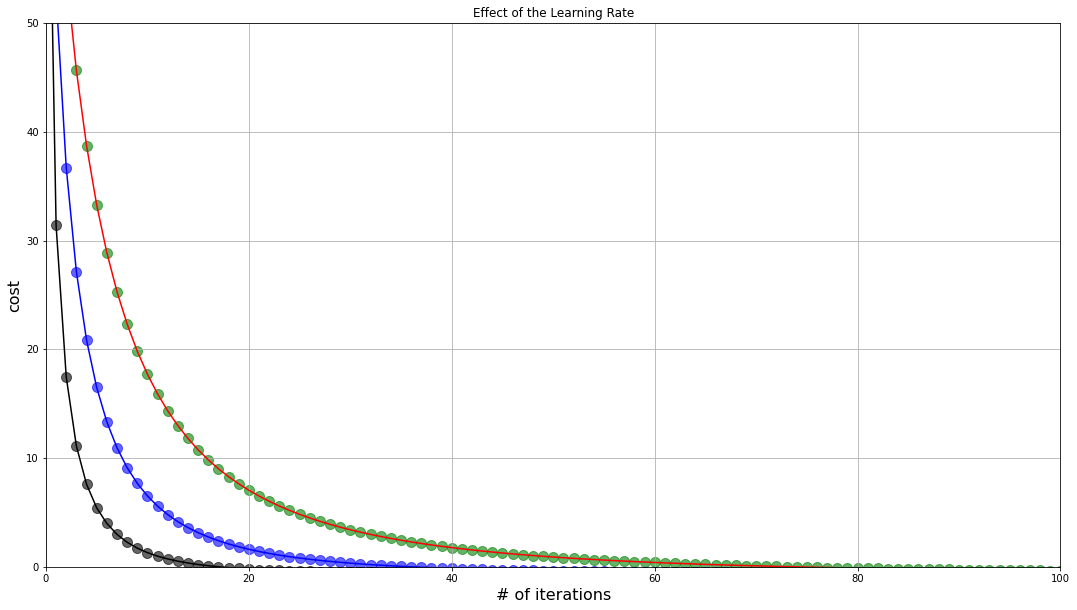

In [67]:
# Plotting function, scatter and derivative, next to each other

n=100
# In case the initial guess is assumed as -0.2, this notebook will show an overflow error
low_gamma = gradient_descent(derivative_fun = dh, initial_guess = 3, learning_rate = 0.0005, precision = 0.0001,max_iter = n)

mid_gamma = gradient_descent(derivative_fun = dh, initial_guess = 3, learning_rate = 0.001, precision = 0.0001,max_iter = n)

high_gamma = gradient_descent(derivative_fun = dh, initial_guess = 3, learning_rate = 0.002, precision = 0.0001,max_iter = n)

# Scaling the graph
plt.figure(figsize=[40,10])

# 1 Chart: Cost function
plt.subplot(1,2,1) # This command decides how to stack the two graphs. If required, (2,1,1), to have them on top of each other

plt.xlim(0,n)
plt.ylim(0,50)
plt.grid(True)
plt.title('Effect of the Learning Rate')
plt.xlabel('# of iterations',fontsize=16)
plt.ylabel('cost',fontsize=16)

#Data Generation
# 1) Y Axis data: From list to numpy arrays
low_values = np.array(low_gamma[1])
#print(type(low_values))
#print(type(low_values))
#print(len(low_values))

# 2) X Axis data: Creating a list from 0 to n+1
iteration_list = list(range(0,n+1))
#print(type(iteration_list))
#print(len(iteration_list))

# 1) Y Axis data: From list to numpy arrays
mid_values = np.array(mid_gamma[1])
#print(type(low_values))
#print(type(low_values))
#print(len(low_values))

# 1) Y Axis data: From list to numpy arrays
high_values = np.array(high_gamma[1])
#print(type(high_values))
#print(type(high_values))
#print(len(high_values))


plt.plot(iteration_list,h(low_values),'r')
plt.scatter(iteration_list,h(low_values),s=100,color='green',alpha=0.6)

plt.plot(iteration_list,h(mid_values),'b')
plt.scatter(iteration_list,h(mid_values),s=100,color='blue',alpha=0.6)

plt.plot(iteration_list,h(high_values),'black')
plt.scatter(iteration_list,h(high_values),s=100,color='black',alpha=0.6)


plt.show()